# 🧪 Metabolomics Analysis using Data from Metabolomics Workbench



This notebook demonstrates a real-world data integration pipeline involving the **Murtha Cancer Center Data Platform** and external public resources like the **Metabolomics Workbench**. This notebook analyzes metabolomics data from study ID **ST003847**, a study retrieved from the [Metabolomics Workbench](https://www.metabolomicsworkbench.org/).

---

## 📁 Study Overview

- **Study ID**: `ST003847`  
- **Analysis ID**: `AN006322`  
- **Project ID**: `PR002405`  
- **DATATRACK ID**: `5761`  
- **Submission Date**: `April 7, 2025`

---

## 📚 Citation
  This data is available at the NIH Common Fund’s National Metabolomics Data Repository (NMDR) website, the Metabolomics Workbench, https://www.metabolomicsworkbench.org where it has been assigned Project ID `PR002405` and Study ID `ST003847`. The data can be accessed directly via it’s Project DOI: `10.21228/M8RV70`. This work is supported by Metabolomics Workbench/National Metabolomics Data Repository (NMDR) (grant# U2C-DK119886), Common Fund Data Ecosystem (CFDE) (grant# 3OT2OD030544) and Metabolomics Consortium Coordinating Center (M3C) (grant# 1U2C-DK119889).  This project and study can be accessed directly at the following URL: https://doi.org/10.21228/M8RV70

---

## 🧪 Project Details

- **Project Title**:  
  *Differential acquisition of extracellular lipid correlates with pancreatic cancer subtype and metastatic tropism*

- **Type**: Metabolomics  
- **Institute**: University of California, San Francisco  
- **Department**: Anatomy  
- **PI**: Gilles Rademaker (📧 gilles.rademaker@ucsf.edu)

---


## 🧾 Study Summary (Key Insights)

- Pancreatic ductal adenocarcinoma (PDAC) is a lethal disease with poor survival rates.
- PDAC can be classified into two molecular subtypes: **Basal** and **Classical**.
- The team identified differential expression of **PCSK9**, a regulator of LDL uptake:
  - **Basal PDAC** shows suppressed PCSK9 and high LDL uptake.
  - **Classical PDAC** expresses PCSK9 and shows distinct metastatic behavior.
- **Metastatic Tropism Insight**:
  - Basal tumors are more likely to colonize the **liver**.
  - Classical tumors show preference for **lung** metastasis.
- Modulating PCSK9 levels alters metastatic behavior, highlighting cholesterol metabolism as a potential therapeutic target.

---

## 🔬 Subject Metadata

- **Subject Type**: Cultured Cells  
- **Species**: *Homo sapiens*  
- **NCBI Taxonomy ID**: 9606

---

### 📁 Files Used:
- `ST003847_factors.tsv`: Sample metadata including experimental condition (`Variant`) and identifiers.
- `ST003847_AN006322_datatable.tsv`: Metabolite intensities (rows: metabolites, columns: samples).

---

### 🎯 Objectives:
1. Align metadata and expression data using sample IDs.
2. Perform differential metabolite analysis between experimental groups.
3. Visualize variation using PCA, volcano plot, boxplots, and heatmaps.

---

In [1]:
import requests
import pandas as pd
from io import StringIO
from pathlib import Path

study_id = "ST003847"
base_url = "https://www.metabolomicsworkbench.org/rest"
output_dir = Path(f"{study_id}_api_downloads")
output_dir.mkdir(exist_ok=True)

endpoints = {
    "summary": f"{base_url}/study/study_id/{study_id}/summary/txt",
    "factors": f"{base_url}/study/study_id/{study_id}/factors/txt",
    "analysis": f"{base_url}/study/study_id/{study_id}/analysis/txt",
    "metabolites": f"{base_url}/study/study_id/{study_id}/metabolites/txt",
    "data": f"{base_url}/study/study_id/{study_id}/data/txt",
    "mwtab": f"{base_url}/study/study_id/{study_id}/mwtab/txt",
}

print(f"📥 Downloading study-level data for {study_id}...\n")
for name, url in endpoints.items():
    print(f"⬇️  {name} ...")
    r = requests.get(url)
    if r.status_code == 200:
        file_path = output_dir / f"{study_id}_{name}.tsv"
        file_path.write_text(r.text)
        print(f"   ✅ Saved to {file_path.name}")
    else:
        print(f"   ❌ Failed: HTTP {r.status_code}")


print("\n📑 Fetching analysis ID list...")
alist_url = f"{base_url}/study/study_id/{study_id}/analysis_id/txt"
r = requests.get(alist_url)

if r.status_code == 200:
    content = r.text.strip()
    if "does not exist" in content.lower():
        print("❌ API response indicates this output item does not exist.")
    else:
        df = pd.read_csv(StringIO(content), header=None)
        analysis_ids = df.iloc[:, 0].tolist()
        print(f"   🔢 Found {len(analysis_ids)} analysis ID(s): {analysis_ids}")

        for aid in analysis_ids:
            dt_url = f"{base_url}/study/analysis_id/{aid}/datatable"
            print(f"⬇️  Downloading datatable for {aid} ...")
            r2 = requests.get(dt_url)
            if r2.status_code == 200:
                outf = output_dir / f"{study_id}_{aid}_datatable.tsv"
                outf.write_text(r2.text)
                print(f"   ✅ Saved: {outf.name}")
            else:
                print(f"   ❌ Failed {aid}: HTTP {r2.status_code}")
else:
    print(f"❌ Failed to fetch analysis list: HTTP {r.status_code}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
📥 Downloading study-level data for ST003847...

⬇️  summary ...
   ✅ Saved to ST003847_summary.tsv
⬇️  factors ...
   ✅ Saved to ST003847_factors.tsv
⬇️  analysis ...
   ✅ Saved to ST003847_analysis.tsv
⬇️  metabolites ...
   ✅ Saved to ST003847_metabolites.tsv
⬇️  data ...
   ✅ Saved to ST003847_data.tsv
⬇️  mwtab ...
   ✅ Saved to ST003847_mwtab.tsv

📑 Fetching analysis ID list...
❌ API response indicates this output item does not exist.


### ✅ Here's What Each File Gives You

| File                             | Purpose                                                  |
|----------------------------------|----------------------------------------------------------|
| `ST003847_AN006322_datatable.tsv` | Intensity table for **identified metabolites**           |
| `ST003847_data.tsv`             | Intensity table (possibly full matrix, raw or normalized)|
| `ST003847_factors.tsv`          | Sample metadata (group labels like subtype)              |
| `ST003847_metabolites.tsv`      | Metabolite annotations (RefMet, KEGG, etc.)              |
| `ST003847_mwtab.tsv`            | Full study data in standardized **mwTab** format         |
| `ST003847_summary.tsv`          | Summary of study design                                  |



---

### 🌐 Integration Highlight

This dataset showcases successful integration of **public metabolomics data** into our **Murtha Cancer Center's internal oncology informatics workflows**, enabling:

- Cross-validation with **local multi-omic datasets**
- Hypothesis generation on metabolic vulnerabilities
- Enrichment of patient stratification models using public tumor metabolism signatures

---

➡️ [View Study on Metabolomics Workbench](https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?STUDY_ID=ST003847)

In [2]:
with open("ST003847_api_downloads/ST003847_analysis.tsv") as f:
    lines = f.readlines()

analysis_info = dict(line.strip().split("\t", 1) for line in lines if "\t" in line)
analysis_id = analysis_info.get("analysis_id")
print("✅ Extracted analysis_id:", analysis_id)

✅ Extracted analysis_id: AN006322


In [3]:
dt_url = f"https://www.metabolomicsworkbench.org/rest/study/analysis_id/{analysis_id}/datatable"
r = requests.get(dt_url)
if r.status_code == 200:
    with open(f"ST003847_api_downloads/ST003847_{analysis_id}_datatable.tsv", "w") as f:
        f.write(r.text)
    print("✅ Datatable saved.")
else:
    print(f"❌ Failed to download datatable: HTTP {r.status_code}")

✅ Datatable saved.


## 📥 Load Metadata and Expression Data

We load the metadata and expression data into pandas DataFrames.  
Metadata is parsed from repeating blocks (6 rows per sample).  
Expression data contains metabolite measurements for each sample.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import seaborn as sns
from scipy.stats import ttest_ind

# Step 1: Load and parse factors file
factors_path = "ST003847_api_downloads/ST003847_factors.tsv"
factors_df = pd.read_csv(factors_path, sep="\t")

# Parse every 6-line block
parsed_records = []
sample_map = {}
for i in range(0, len(factors_df), 6):
    record = {}
    local_id, mb_id = None, None
    for j in range(6):
        if i + j >= len(factors_df):
            continue
        key, val = factors_df.iloc[i + j]
        record[key] = val
        if key == "local_sample_id":
            local_id = str(val).strip()
        if key == "mb_sample_id":
            mb_id = str(val).strip()
    if record:
        parsed_records.append(record)
    if local_id and mb_id:
        sample_map[local_id] = mb_id

## 🧼 Clean and Parse Metadata

For each sample:
- Extract `local_sample_id` (used in data table).
- Extract `mb_sample_id` (unique sample ID like `SA420595`).
- Extract `Variant` label from the factors field.

All values are compiled into a structured table for further merging.

In [5]:
# Create metadata table and extract Variant
parsed_metadata = pd.DataFrame(parsed_records)
parsed_metadata["local_sample_id"] = parsed_metadata["local_sample_id"].astype(str)
parsed_metadata["mb_sample_id"] = parsed_metadata["mb_sample_id"].astype(str)
parsed_metadata["Variant"] = (
    parsed_metadata["factors"].str.extract(r"Variant:([^|]+)").iloc[:, 0].str.strip()
)

# Step 2: Load expression data
data_df = pd.read_csv(
    "ST003847_api_downloads/ST003847_AN006322_datatable.tsv",
    sep="\t",
)
data_df = data_df.rename(columns={"Samples": "local_sample_id"})
data_df["local_sample_id"] = data_df["local_sample_id"].astype(str)

## 🧬 Prepare Expression Matrix and Align Samples

Steps:
- Map `local_sample_id` to `mb_sample_id`.
- Match samples between metadata and expression data.
- Transpose the data to have **samples as rows**, metabolites as columns.
- Normalize using **z-score standardization** to center and scale each feature.

In [6]:
# Step 3: Filter for common samples
common_ids = set(data_df["local_sample_id"]) & set(parsed_metadata["local_sample_id"])
data_df = data_df[data_df["local_sample_id"].isin(common_ids)].copy()
parsed_metadata = parsed_metadata[
    parsed_metadata["local_sample_id"].isin(common_ids)
].copy()

# Step 4: Set mb_sample_id as index for both
data_df["mb_sample_id"] = data_df["local_sample_id"].map(sample_map)
parsed_metadata.set_index("mb_sample_id", inplace=True)
data_df.set_index("mb_sample_id", inplace=True)
data_df.drop(columns="local_sample_id", inplace=True)

# Step 5: Group by Variant
group1 = data_df[parsed_metadata["Variant"] == "HPAC"]
group2 = data_df[parsed_metadata["Variant"] == "KP4_Control"]

## 🧪 Differential Analysis

We compare metabolite levels between groups (e.g., `HPAC` vs `KP4_Control`) using **independent t-tests**.

For each metabolite:
- Compute **p-value** using `scipy.stats.ttest_ind`.
- Calculate **log2 fold change** between the groups.
- Derive **-log10(p-value)** for volcano plot display.

A result table includes:

| Metabolite           | p-value  | log2FC   | -log10(p-value) | Significant |
|----------------------|----------|----------|------------------|-------------|
| 7-Dehydrocholesterol | 0.001997 | -3.18512 | 2.69972          | True        |
| 7-Dehydrodesmosterol | 0.737751 | -0.27769 | 0.13209          | False       |

In [7]:
# Step 6: Differential analysis
ttest_results = []
for metabolite in data_df.columns:
    if metabolite not in group1 or metabolite not in group2:
        continue
    values1 = group1[metabolite]
    values2 = group2[metabolite]
    if values1.nunique() <= 1 and values2.nunique() <= 1:
        continue
    stat, pval = ttest_ind(values1, values2, nan_policy="omit")
    fold_change = values1.mean() / values2.mean()
    ttest_results.append(
        {"Metabolite": metabolite, "p-value": pval, "log2FC": np.log2(fold_change)}
    )

ttest_df = pd.DataFrame(ttest_results)
ttest_df["-log10(p-value)"] = -np.log10(ttest_df["p-value"])
ttest_df["Significant"] = ttest_df["p-value"] < 0.1
ttest_df

Metabolite   p-value    log2FC  -log10(p-value)  Significant
0  7-Dehydrocholesterol  0.001997 -3.185117         2.699721         True
1  7-Dehydrodesmosterol  0.737751 -0.277688         0.132090        False

## 🌋 Volcano Plot

Visual representation of differential analysis.

- **X-axis**: Log2 Fold Change (expression difference).
- **Y-axis**: -log10(p-value) (statistical significance).
- **Each dot**: One metabolite.

🧭 Threshold lines for:
- p-value = 0.05

Color-coded by significance (if applied), or all points shown.

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

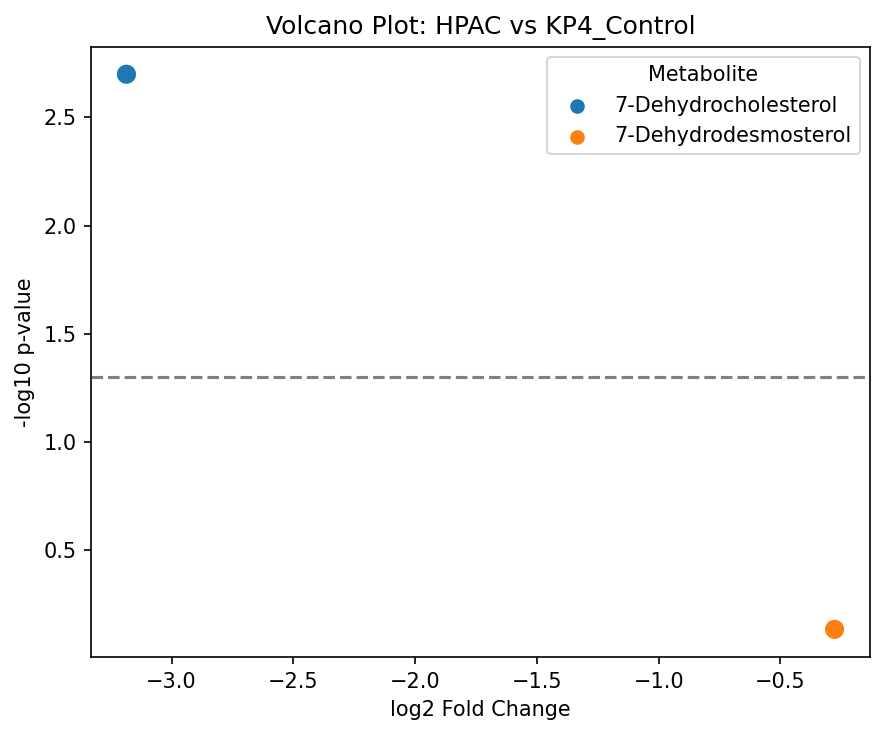

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

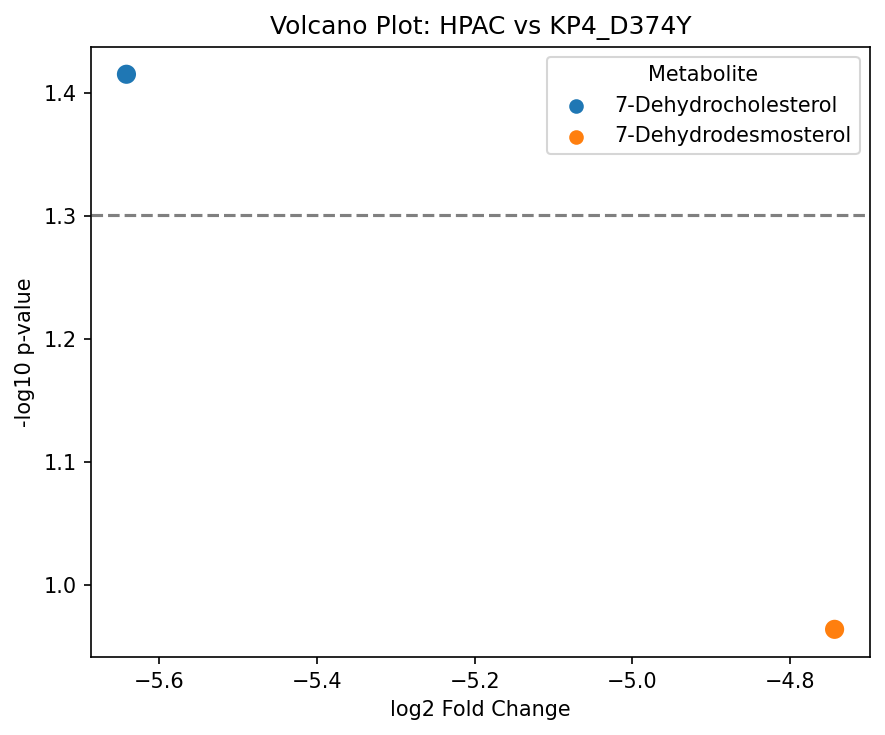

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

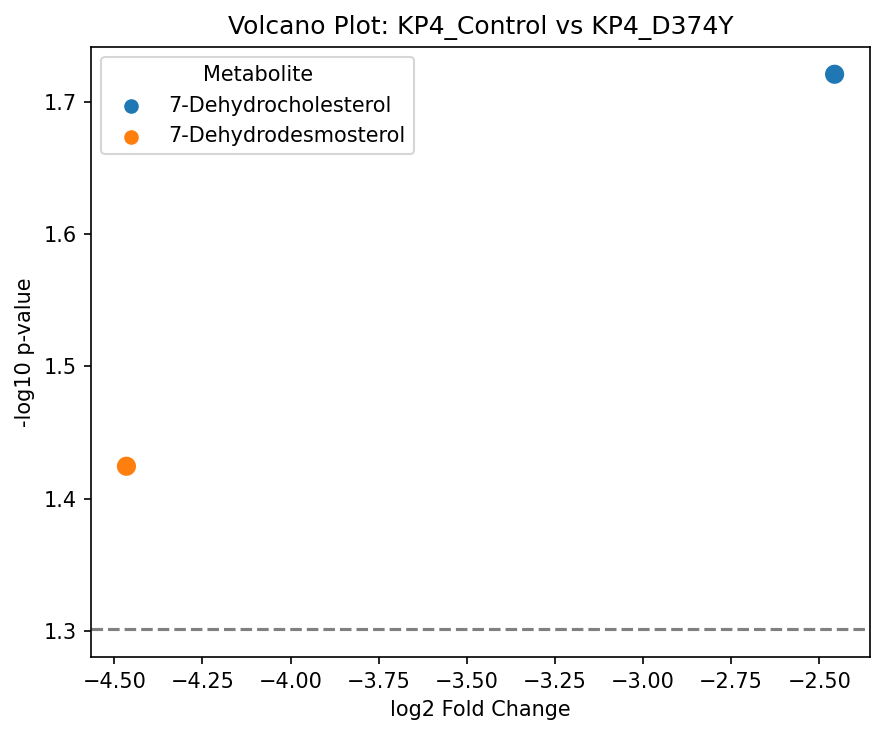

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

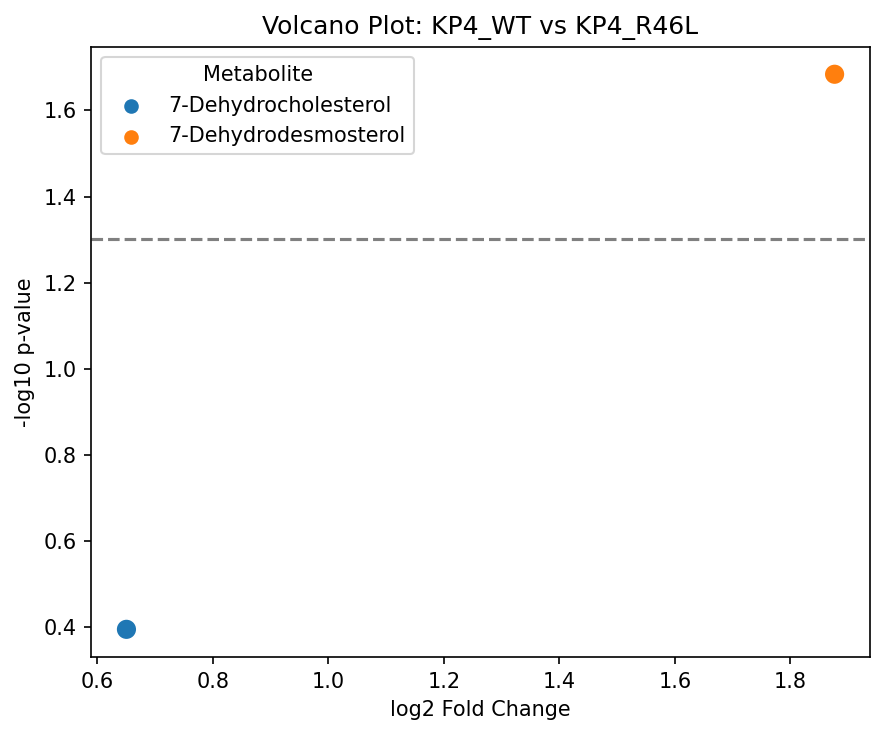

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

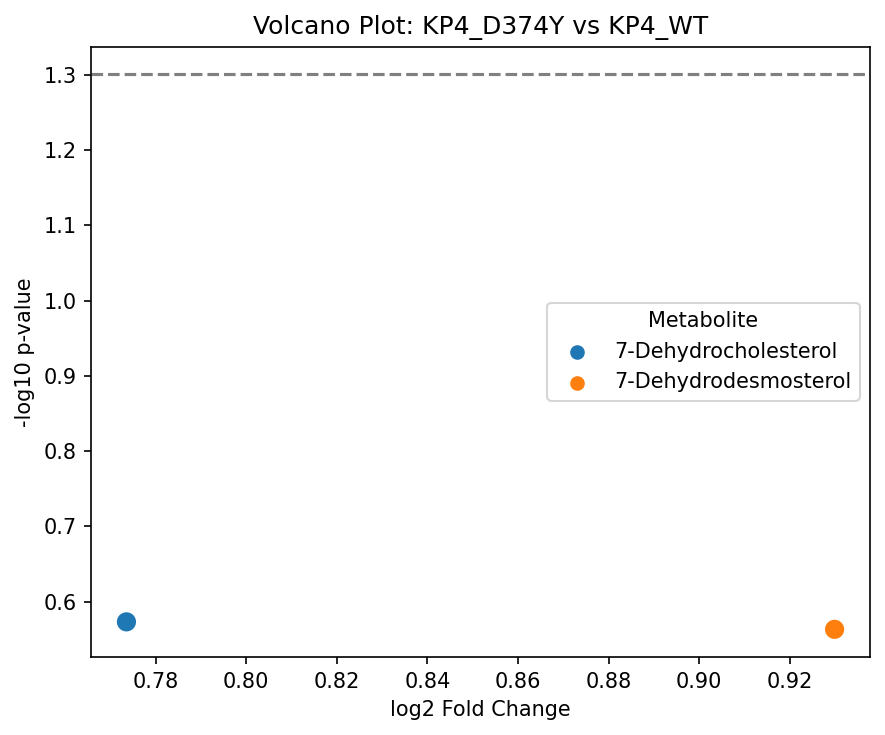

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

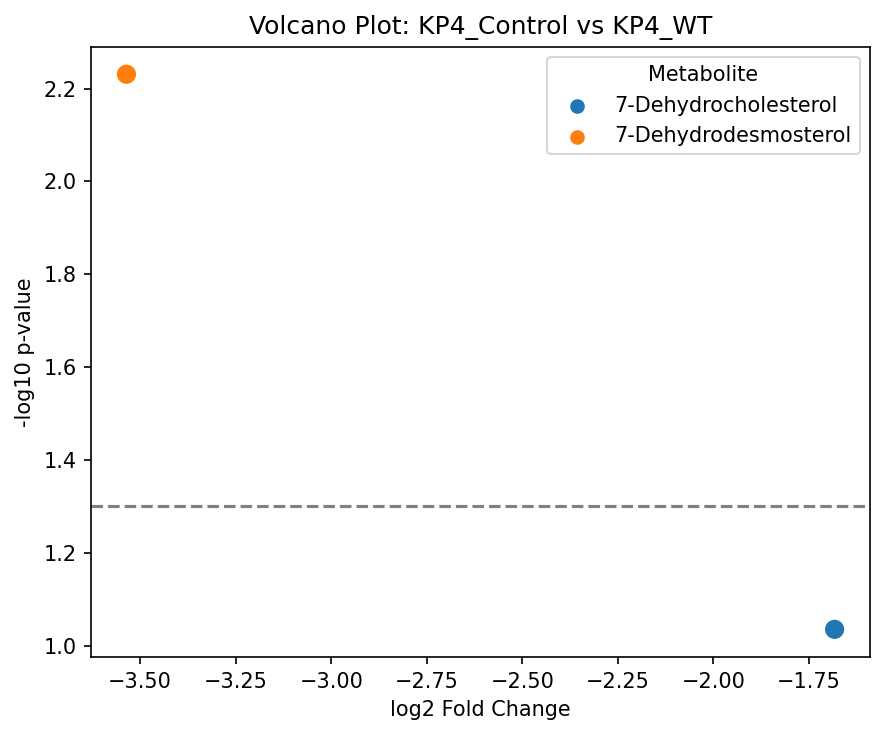

In [8]:
df = pd.read_csv("ST003847_api_downloads/ST003847_AN006322_datatable.tsv", sep="\t")

comparisons = [
    ("HPAC", "KP4_Control"),
    ("HPAC", "KP4_D374Y"),
    ("KP4_Control", "KP4_D374Y"),
    ("KP4_WT", "KP4_R46L"),
    ("KP4_D374Y", "KP4_WT"),
    ("KP4_Control", "KP4_WT"),
]

metabolites = ["7-Dehydrocholesterol", "7-Dehydrodesmosterol"]

for group1, group2 in comparisons:
    df1 = df[df["Class"].str.contains(group1, na=False)]
    df2 = df[df["Class"].str.contains(group2, na=False)]

    results = []
    for met in metabolites:
        stat, pval = ttest_ind(df1[met], df2[met], nan_policy="omit")
        log2fc = np.log2(df1[met].mean() / df2[met].mean())
        results.append({"Metabolite": met, "p-value": pval, "log2FC": log2fc})

    volcano_df = pd.DataFrame(results)
    volcano_df["-log10(p-value)"] = -np.log10(volcano_df["p-value"])

    plt.figure(figsize=(6, 5))
    plot = sns.scatterplot(
        data=volcano_df, x="log2FC", y="-log10(p-value)", hue="Metabolite", s=100
    )
    plt.axhline(-np.log10(0.05), ls="--", color="gray")
    plt.title(f"Volcano Plot: {group1} vs {group2}")
    plt.xlabel("log2 Fold Change")
    plt.ylabel("-log10 p-value")
    plt.legend(title="Metabolite", loc="best")
    plt.tight_layout()
    plt.show()

## 📊 PCA Projection
- Conducted PCA to reduce the two selected metabolites to two principal components (PC1 and PC2).
- Plotted samples in the 2D PCA space colored by variant.
- Added **confidence ellipses** for each variant group (if enough data points exist), showing distribution in PCA space.

## 📈 Result Interpretation
- The PCA plot helps visualize how samples cluster based on lipid metabolite profiles.
- Variants with similar metabolic behavior cluster together.
- The percentage variance explained by PC1 and PC2 is indicated on the axes.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

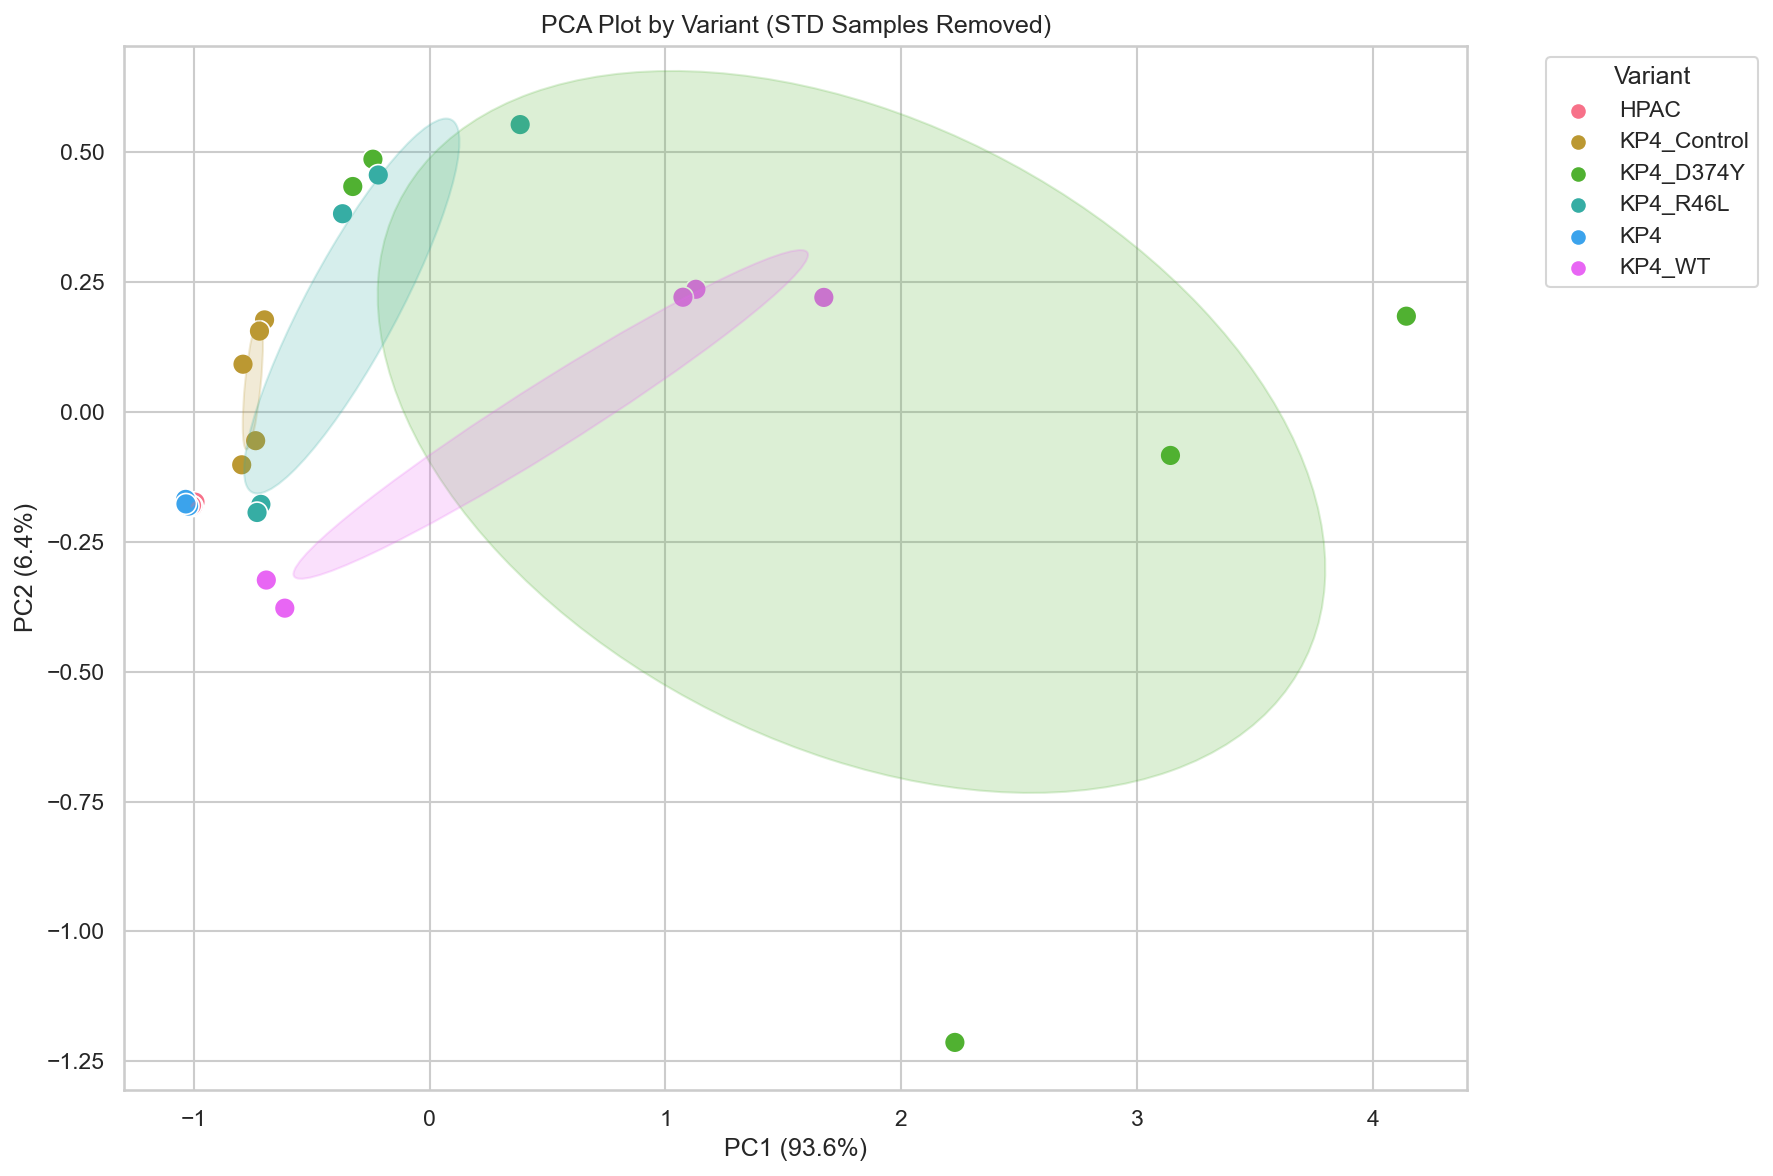

In [9]:
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse


data_path = "ST003847_api_downloads/ST003847_AN006322_datatable.tsv"
df = pd.read_csv(data_path, sep="\t")
df["Variant"] = df["Class"].str.extract(r"Variant:([^|]+)").iloc[:, 0].str.strip()
df = df[~df["Variant"].str.contains("STD", na=False)]


features = ["7-Dehydrocholesterol", "7-Dehydrodesmosterol"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", df["Variant"].nunique())
variant_color_map = dict(zip(df["Variant"].unique(), palette))

sns.scatterplot(data=df, x="PC1", y="PC2", hue="Variant", palette=variant_color_map, s=100, edgecolor='w')


for variant, color in variant_color_map.items():
    group = df[df["Variant"] == variant]
    if len(group) > 2:
        cov = np.cov(group[["PC1", "PC2"]].T)
        mean = group[["PC1", "PC2"]].mean().values
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(vals)
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, color=color, alpha=0.2)
        plt.gca().add_patch(ellipse)

plt.title("PCA Plot by Variant (STD Samples Removed)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Variant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 🔬 Radar-style Heatmap: Z-score of Metabolites by Variant

This section summarizes the metabolomic differences across sample **variants** using a radar-style heatmap visualization.


### 🧼 Data Processing Steps
1. **Remove standard samples** labeled as `STD` from the dataset.
2. **Extract `Variant` information** from the `Class` field.
3. **Select relevant metabolite columns**, excluding metadata like `Samples`, `Class`, and `Variant`.
4. **Aggregate** the dataset by `Variant` using the **mean** value for each metabolite.
5. **Z-score normalize** across all metabolites using `StandardScaler` to highlight relative intensities.

### 🔥 Visualization
- The final plot is a **clustered heatmap** (radar-style) showing the standardized metabolite values (Z-scores) for each variant.
- Color gradients indicate **higher or lower abundance** relative to the mean.
- Helps visually detect **distinct metabolic profiles** across different variant groups.

This method enables a high-level overview of how lipid profiles vary across PDAC subtypes or experimental conditions in the Murtha Cancer Center dataset.

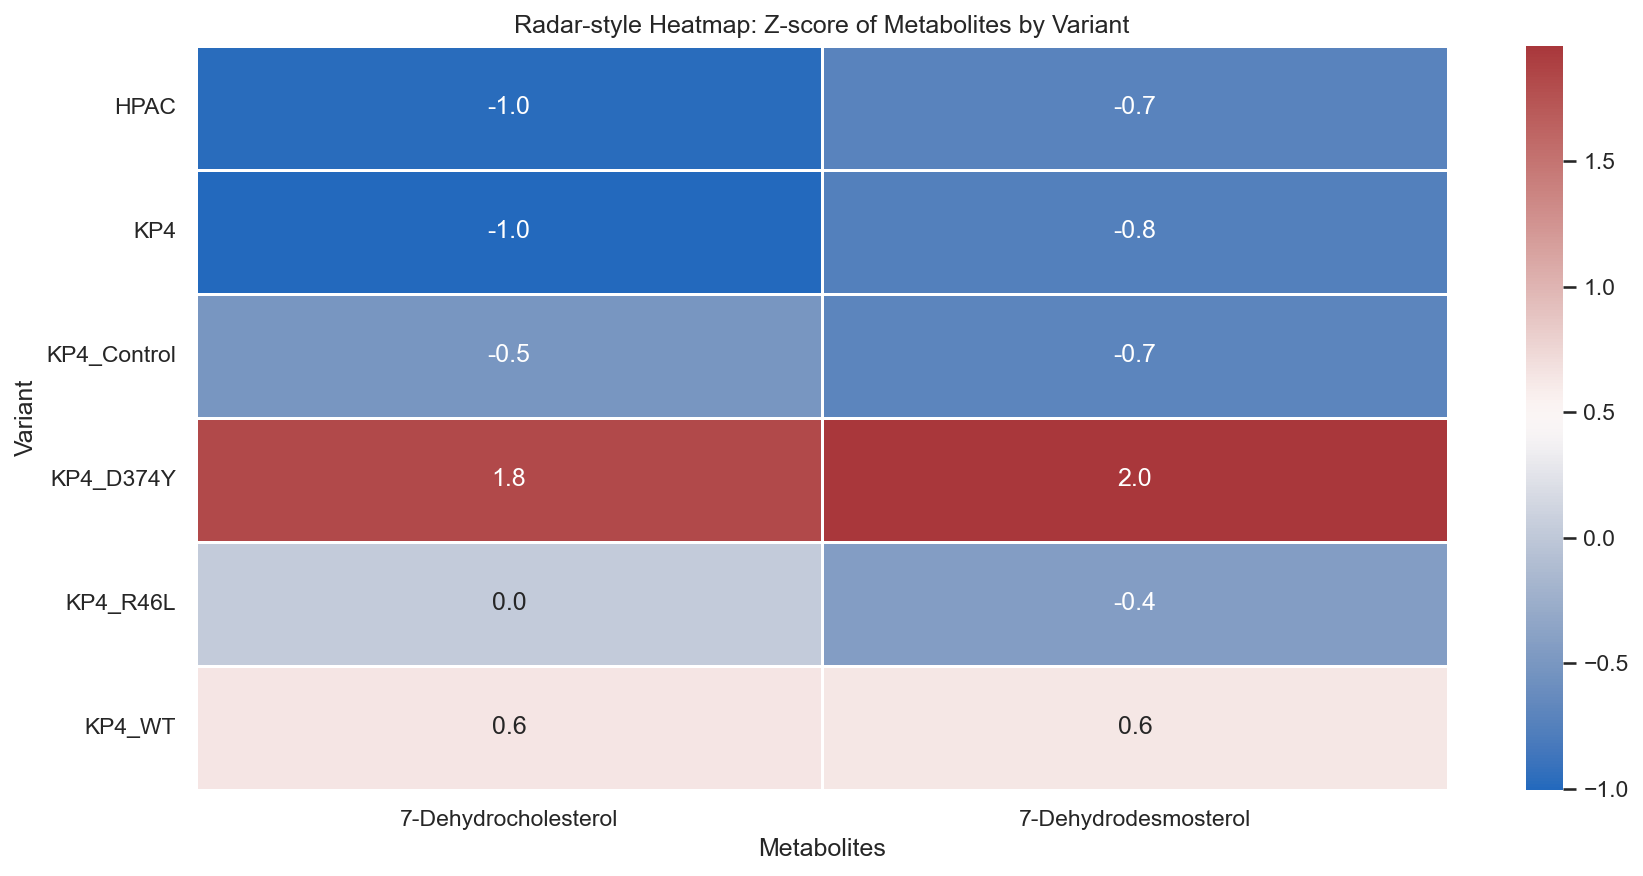

In [10]:
from sklearn.preprocessing import StandardScaler

# Load data
data_path = "ST003847_api_downloads/ST003847_AN006322_datatable.tsv"
df = pd.read_csv(data_path, sep="\t")

# Drop STD samples
df = df[~df["Class"].str.contains("STD", na=False)]

# Keep only relevant columns: Variant and metabolite values
df["Variant"] = df["Class"].str.extract(r"Variant:([^|]+)").iloc[:, 0].str.strip()
metabolite_cols = df.columns.difference(["Samples", "Class", "Variant"])
df_clean = df[["Variant"] + list(metabolite_cols)]

# Group by Variant, take mean
grouped = df_clean.groupby("Variant").mean()

# Z-score normalize across metabolites
scaler = StandardScaler()
grouped_scaled = pd.DataFrame(scaler.fit_transform(grouped), 
                              index=grouped.index, 
                              columns=grouped.columns)

# Plot radar heatmap (like clustered heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_scaled, cmap="vlag", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Radar-style Heatmap: Z-score of Metabolites by Variant")
plt.xlabel("Metabolites")
plt.ylabel("Variant")
plt.tight_layout()
plt.show()

### 📊 Visualization of Key Metabolites Across PDAC Variants

In this section, we explore the distribution and abundance of two key metabolites:
- **7-Dehydrocholesterol**
- **7-Dehydrodesmosterol**


### 🧪 Processing Steps
1. **Load and clean the data**:
   - Extract variant labels from the `Class` field.
   - Remove standard/control samples labeled as `STD`.

2. **Reshape the dataset** for tidy plotting using the `melt` function.

### 📦 Visualizations
- **Boxplot**:
  - Shows the **distribution** of metabolite levels across sample variants.
  - Helps identify median, spread, and potential outliers.

- **Swarmplot**:
  - Overlays individual data points per sample.
  - Highlights **within-variant variability** and cluster tightness.

- **Barplot**:
  - Displays **average abundance** of each metabolite by variant.
  - Useful for comparing general trends across subtypes.

These visualizations help us interpret how **lipid-related metabolites differ** across PDAC variants, supporting hypotheses about metabolic vulnerabilities and metastatic potential in classical vs. basal subtypes.


/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

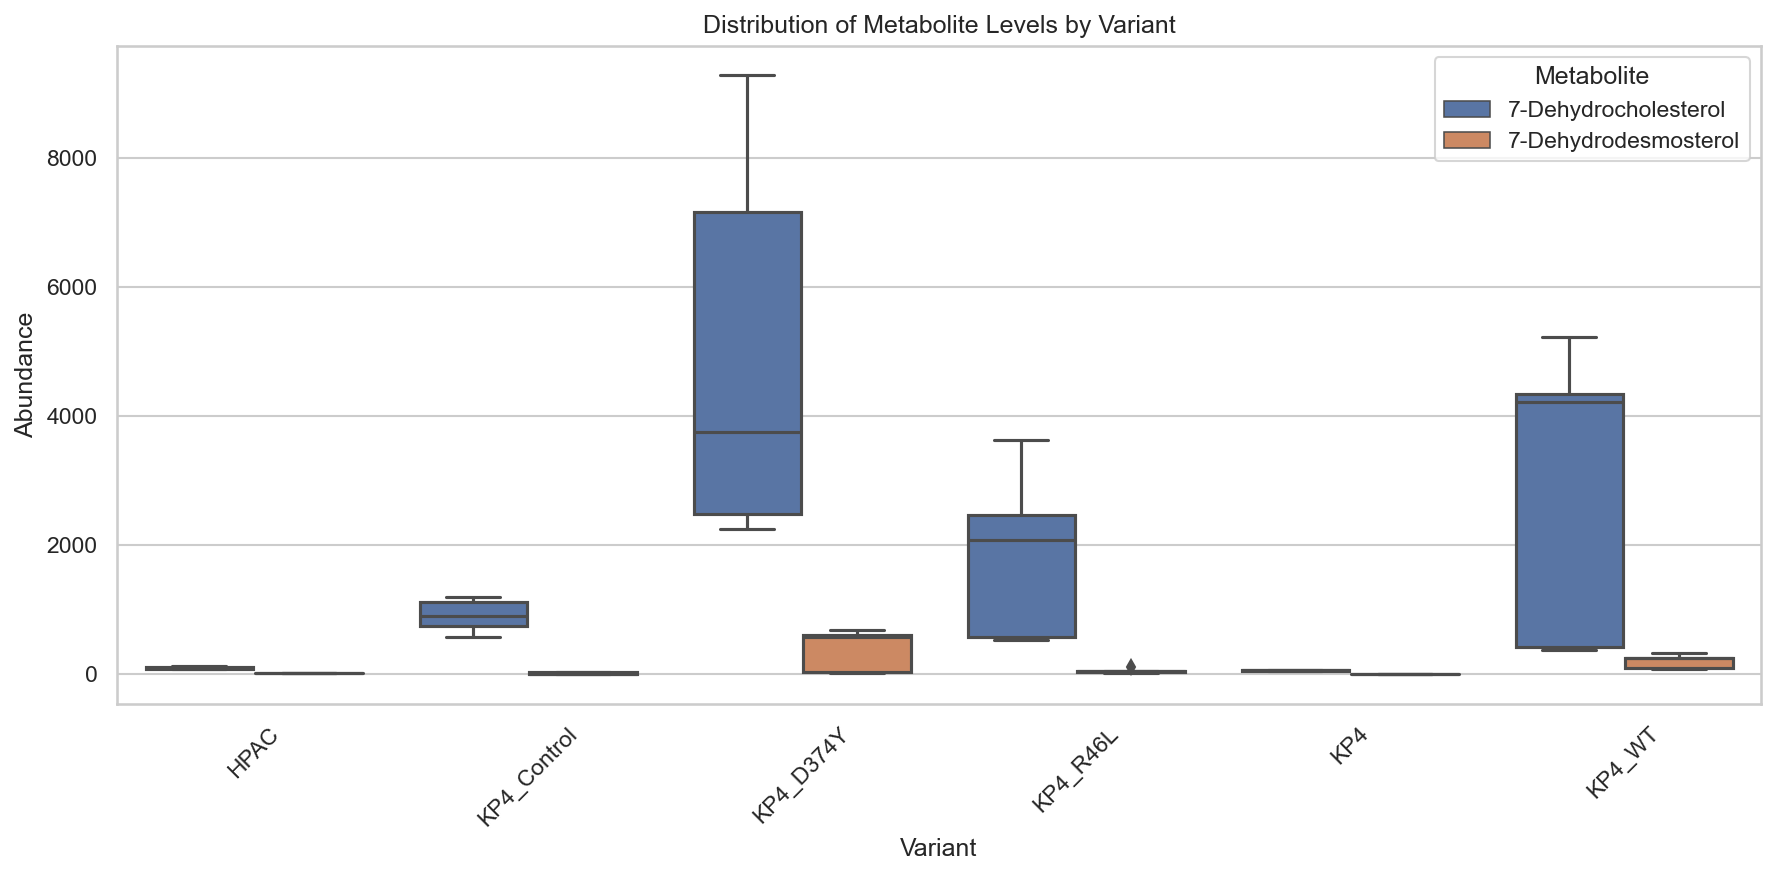

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

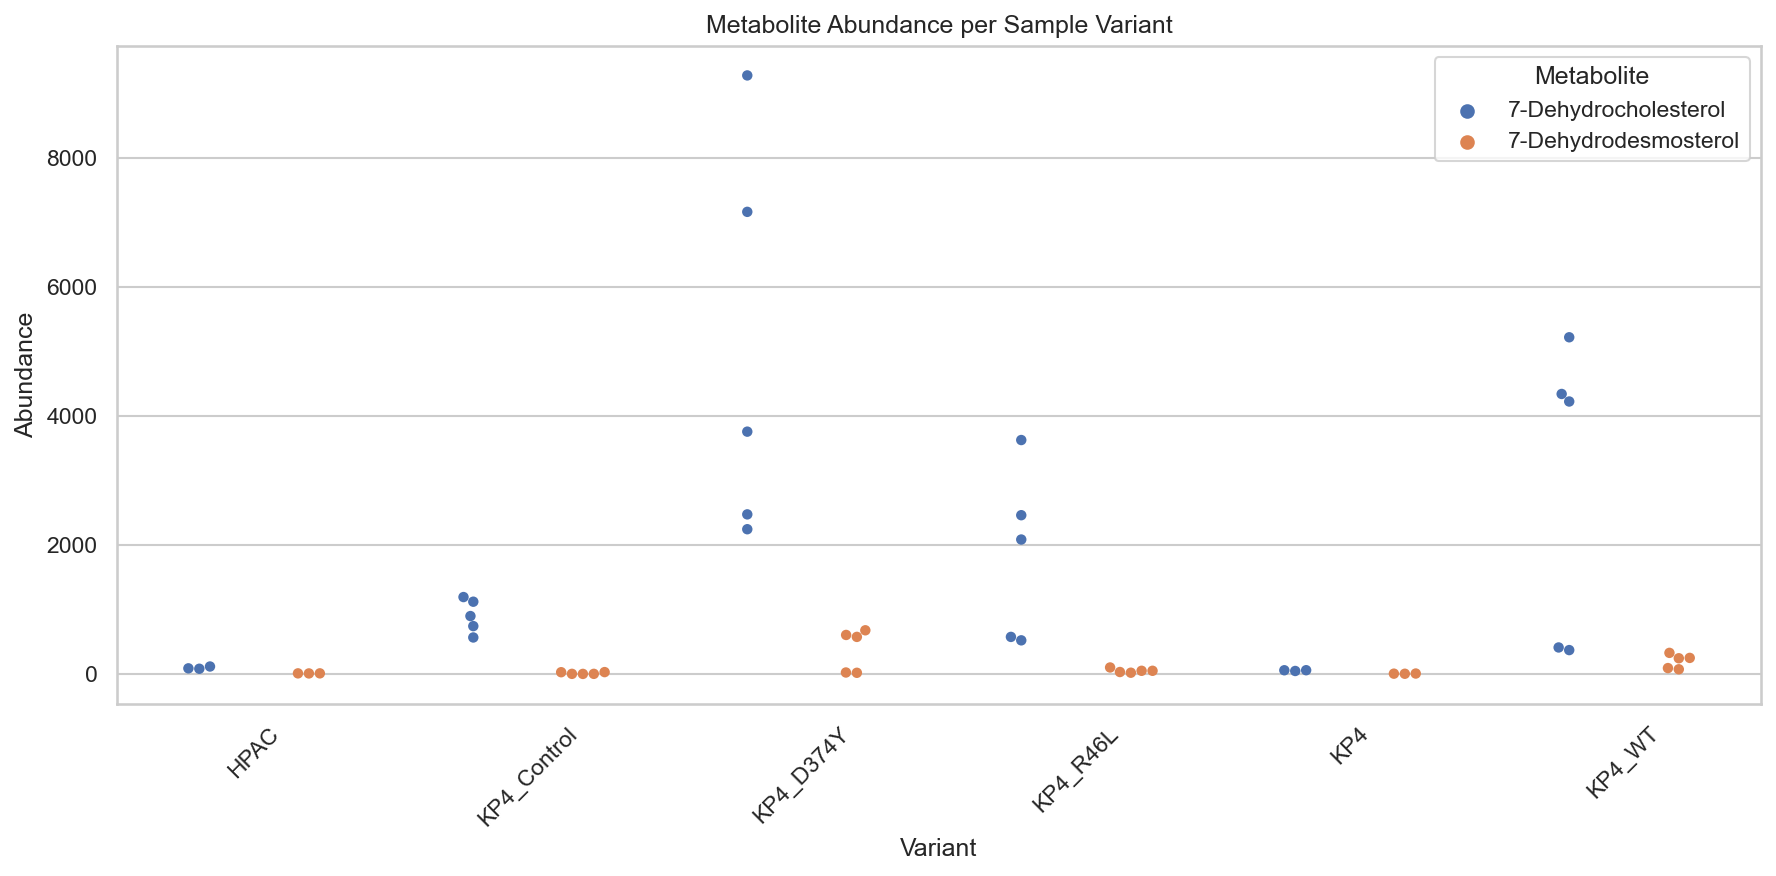

/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielbiber/opt/anaconda3/envs/gen3_ingest/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

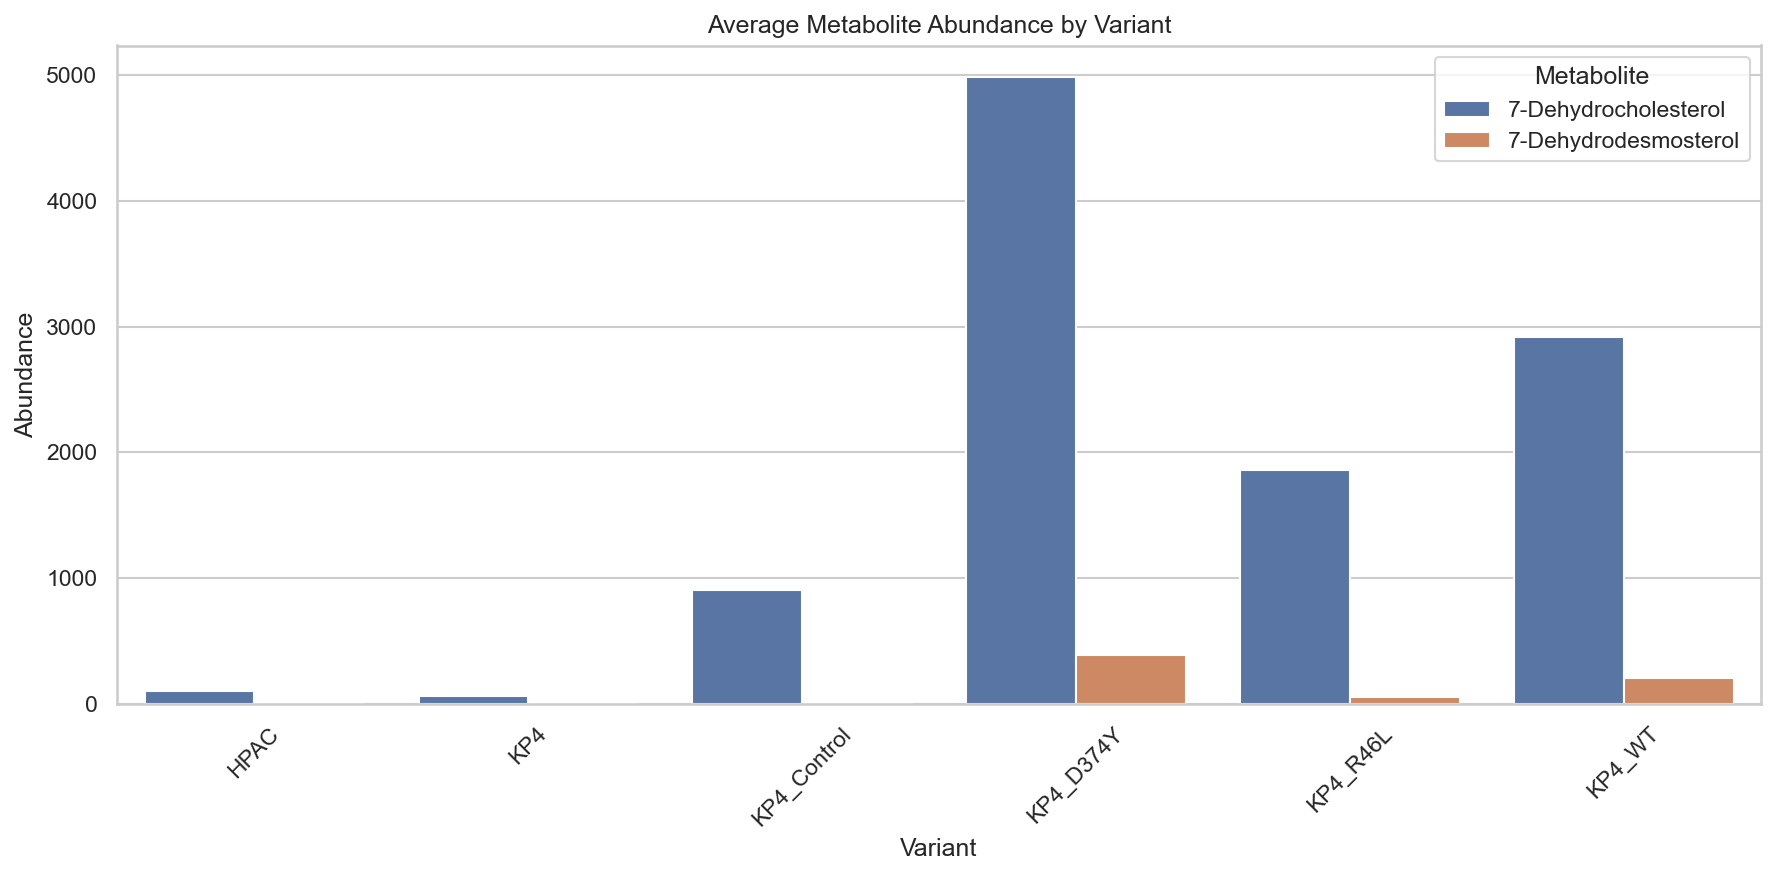

In [11]:
from pathlib import Path

# Load the corrected data
file_path = Path("ST003847_api_downloads/ST003847_AN006322_datatable.tsv")
df = pd.read_csv(file_path, sep="\t")

# Extract variant information from 'Class' column
df["Variant"] = df["Class"].str.extract(r"Variant:([^|]+)").iloc[:, 0].str.strip()

# Filter out standard samples
df_filtered = df[~df["Variant"].str.contains("STD", na=False)]

# Melt data for easier plotting
df_melted = df_filtered.melt(
    id_vars=["Samples", "Variant"],
    value_vars=["7-Dehydrocholesterol", "7-Dehydrodesmosterol"],
    var_name="Metabolite",
    value_name="Abundance"
)

# Boxplot of metabolite levels per variant
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Variant", y="Abundance", hue="Metabolite")
plt.xticks(rotation=45)
plt.title("Distribution of Metabolite Levels by Variant")
plt.tight_layout()
plt.show()

# Swarmplot for detailed data points
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_melted, x="Variant", y="Abundance", hue="Metabolite", dodge=True)
plt.xticks(rotation=45)
plt.title("Metabolite Abundance per Sample Variant")
plt.tight_layout()
plt.show()

# Barplot for average metabolite abundance
avg_df = df_melted.groupby(["Variant", "Metabolite"]).Abundance.mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_df, x="Variant", y="Abundance", hue="Metabolite")
plt.title("Average Metabolite Abundance by Variant")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📥 Downloading and Extracting Raw Metabolomics Data

To complement the processed data and support reproducibility, you could also retrieved the **raw data files** associated with the **ST003847** study from the **Metabolomics Workbench**.


We use the `curl` command to download the zipped archive containing raw experimental files.


In [12]:
!curl -O https://www.metabolomicsworkbench.org/studydownload/ST003847_Rawdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.3M  100 15.3M    0     0  4831k      0  0:00:03  0:00:03 --:--:-- 4834k


In [13]:
import zipfile

zip_path = "ST003847_Rawdata.zip"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("ST003847_raw")

## ✅ Summary

In this notebook, we demonstrated how to integrate and analyze multi-source metabolomics data from the **Murtha Cancer Center Data Platform**, focusing on the study **ST003847** from the **Metabolomics Workbench**.

### Key Highlights:

- 📊 **Data Integration**: Downloaded processed and raw datasets linked to pancreatic cancer subtypes.
- 🧪 **Feature Extraction**: Parsed and cleaned metabolite measurements, removing standard (STD) samples.
- 📉 **Multivariate Analysis**: Performed PCA to visualize subtype separation based on lipid metabolite levels.
- 🔥 **Heatmap Visualization**: Created z-score normalized heatmaps to reveal metabolite patterns across variants.
- 📦 **Variant-Level Statistics**: Generated boxplots, swarmplots, and barplots to compare metabolite distributions by PDAC subtype.
- 🧬 **Biological Insight**: Observed clear differences in **7-Dehydrocholesterol** and **7-Dehydrodesmosterol** between PDAC variants, consistent with the project's hypothesis on cholesterol metabolism and metastatic tropism.

### 🔁 Next Steps:
- Integrate additional `omics` layers (e.g., transcriptomics, proteomics) to build a systems-level view.
- Correlate lipid signatures with clinical metadata for prognostic modeling.
- Apply this framework to other MCCDP studies for cohort-wide biomarker discovery.

This notebook showcases the power of combining public repositories and institutional data platforms for translational cancer research.
